# Near Real Time Ingestion

Semi-real-time ingestion also known as near real-time ingestion, involves processing data with minimal delay, typically in seconds or minutes, rather than instantly. This approach strikes a balance between real-time and batch processing, providing timely insights while reducing the resource intensity and complexity associated with true real-time systems. Semi-real-time ingestion is suitable for applications such as social media monitoring, customer feedback analysis, and operational dashboards, where near-immediate data processing is beneficial but not critically time-sensitive.

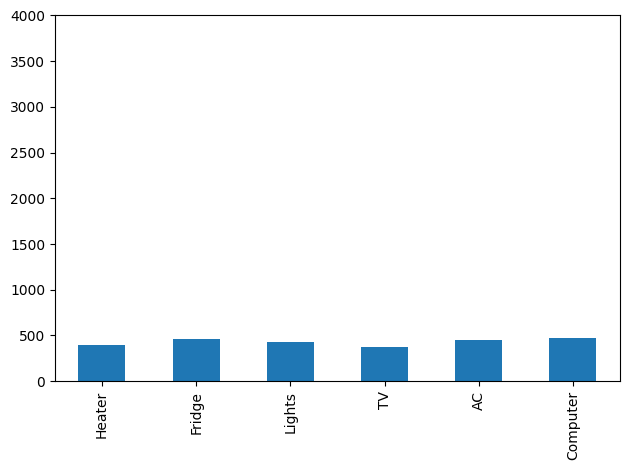

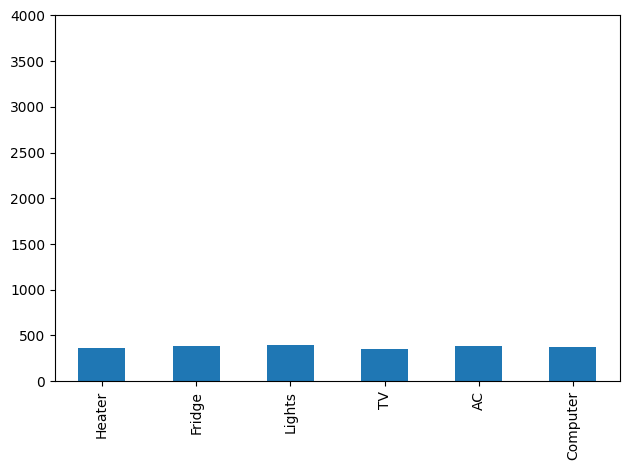

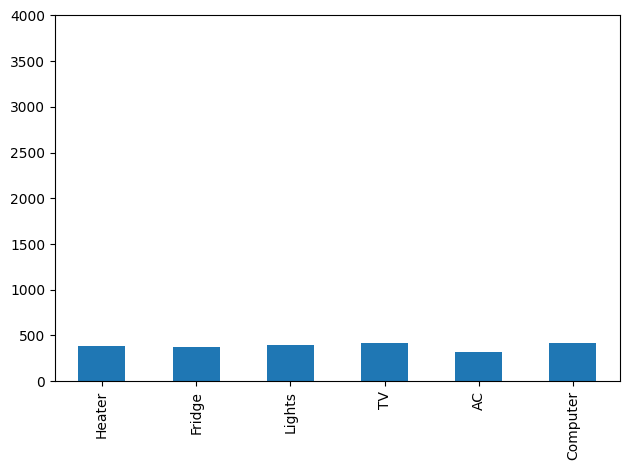

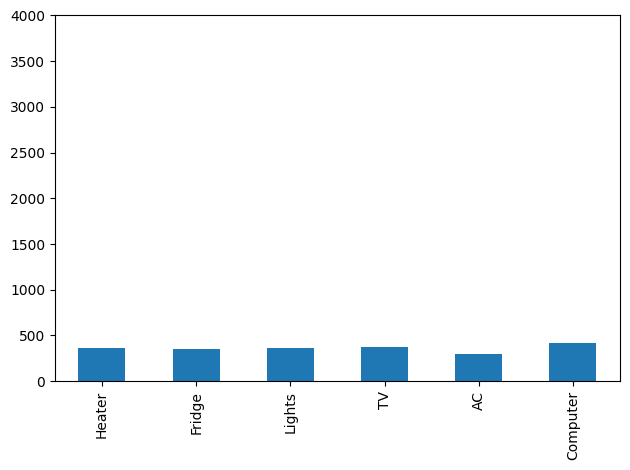

In [ ]:
import time
import random
from collections import Counter, deque
import matplotlib.pyplot as plt
import pandas as pd

def generate_mock_data():
    DEVICES = ["Heater", "Fridge", "Lights", "TV", "AC", "Computer"]
    while True:
        record = {device: random.randint(50, 100) for device in DEVICES}
        yield record
        time.sleep(1)

d1 = Counter()

def load_data(record):
    global d1
    d1 += Counter(record)
    pd.Series(d1).plot(kind='bar')
    plt.ylim(0, 4000) 
    plt.tight_layout()
    plt.show()


def process_semi_real_time(interval, total_time):
    buffer = deque()
    main_start_time = time.time()
    start_time = time.time()
    for record in generate_mock_data():
        buffer.append(record)
        if (time.time() - start_time) >= interval:
            full_buffer = Counter()
            for record in buffer:
                full_buffer += Counter(record)
            load_data(full_buffer)
            buffer.clear()
            start_time = time.time()  # Reset start time
        if (time.time() - main_start_time) >= total_time:
            break


process_semi_real_time(5, 20)